### Von der Theorie zur Praxis: Numerische Methoden  und ihre Bedeutung in der mathematischen Biologie und Chemie 

#### $\color{green}{\text{Prof. Dr. Philipp Öffner}}$
#### $\color{green}{\text{TU Clausthal - Numerische Mathematik }}$ 

In [59]:
import Pkg; Pkg.add("Interact")
Pkg.add("DifferentialEquations")
Pkg.add("Plots")
using DifferentialEquations
using Plots 
using Interact

include("ODE_Problem.jl")
include("Methods_Patankar.jl")
p=1;

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


## Inhaltsangabe 

### 1. Mathematische Modelle in der Biologie und Chemie

### 2. Explizites und implizites Euler-Verfahren 

### 3. Erweiterung der Verfahren zur Strukturerhaltung 


Im Kerncurriculum von  Niedersachsen sind insbesonndere im Leistungskurs (Abschnitt 13/2) ein Block bezüglich Differentialgleichungen vorgesehen. Insbesondere beinhaltet es die Untersuchung von Wachstumsprozessen

- begrenztes und logistisches Wachstum beschreiben, auch als Verkettung und Verknüpfung von Funktionen verschiedene Wachstumsmodelle vergleichen
- asymptotisches Verhalten im Anwendungszusammenhang beschreiben
- Modelle mithilfe zugehöriger Differentialgleichungen beschreiben und mögliche Lösungsfunktionen überprüfen

 
 

### Mathematische Modelle in der Biologie und Chemie 

Zur Beschreibung komplexer biologischer und chemischer Vorgänge nutzt man gewöhnliche Differentialgleichungen.




**Modelle**

- Wachstumsmodell (Einführung)

- Epidemiologie (SIR - Modelle und seine Variationen)

- Chemische Reaktionen (Autokatalyse)





### Wachstumsmodell: Populationsdynamik

Wir betrachten diskrete Zeiten $t_1 <t_2 <t_3$. 
Der Zuwachs oder Abnahme einer Population ist gegeben durch das diskrete Modell: 
\begin{equation}
y(t_{i+1})= y(t_i)+ \Delta G(t_i) - \Delta S(t_i) + \Delta M(t_i) 
\end{equation}
Hierbei bezeichnet 

- $\Delta G(t_i)$: Anzahl der Geburten im Intervall $[t_i, t_{i+1}]$
- $\Delta S(t_i)$: Anzahl der Sterbefälle im Intervall $[t_i, t_{i+1}]$
- $\Delta M(t_i)$: Migration im Intervall $[t_i, t_{i+1}]$

***Annahme:*** $t_i$ äquidistant verteilt, d.h. $\Delta t= t_{i+1}- t_i$ für alle $i$.



So kann man die ***Differenzengleichung*** umformulieren zu

\begin{equation}
\frac{y(t+ \Delta t)- y(t)}{\Delta t}= \frac{\Delta G(t)}{\Delta t} - \frac{\Delta S(t)}{\Delta t} + \frac{\Delta M(t)}{\Delta t}
\end{equation}
 und $\Delta t \to 0$ ergibt die ***Differentialgleichung***
 
\begin{equation}
y'(t)= g(t)- s(t) +m (t)
\end{equation}




### Einfachstes Modell: Exponentielles Wachstum

***Annahme:***

- Keine Migration ($m=0$)
- g(t) ist linear proportional zum aktuellen Bestand, d.h. $g(t)= \alpha y(t)$.
- s(t) ist linear proportional zum aktuellen Bestand, d.h. $s(t)= \beta y(t)$.



Man erhält die folgende Differentialgleichung

\begin{equation}
y'(t)= \lambda y(t)
\end{equation}
mit $\lambda= \alpha- \beta$. 

Mit Anfangsbedingung $y(0)=y_0$ erhält man die Lösung 
$$
y(t)= y_0 \mathrm{e}^{\lambda t}. 
$$

Dies ist Thema des  Kerncurriculum und die Überprüfung von Lösungen von Differentialgleichungen kann/wird im Leistungskurs Mathematik behandelt. 


### Epidemiologie

**SIR-Modell**:

- Susceptible (Ansteckbar): S(t)
- Infected (Infizierte): I(t) 
- Removed (aus dem Infektionsgeschehen): R(t) 

**Gesamtanzahl der Bevölkerung:** $N= S+I+R$


**Annahmen**:
- Jedes Individuum kann von einem Erreger nur einmal infiziert werden.
- Infizierte sind sofort ansteckend, eine Annahme (Erweiterung *SEIR*-Modell).
- Die jeweiligen Raten sind konstant.
- $R$ beinhalted Verstorbene und Immunisierte (Erweiterung *SIRD*-Modell).
- Vernachlässigung von Geburts- und Sterberaten.

**SIR-Modell**:

- $\beta$: Rate, die die Anzahl neuer Infektionen angibt
- $\gamma$: Rate, mit der infizierte Personen in der Zeiteinheit genesen oder sterben
- $\frac{I}{N}$: Anteil infizierter Personen an der Gesamtbevölkerung

\begin{equation}
\begin{cases}
S'&= - \beta I \frac{S}{N}\\
I'&= \beta I \frac{S}{N}- \gamma I\\
R'& = \gamma I
\end{cases}
\end{equation}

**Eigenschaften**: 
- Masseerhaltend (Konservativ): $S'+I'+R'=0$
- Nicht-negativ: $S,I,R \geq0$


<div align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/a/ac/SIR_trajectory.png" width="80%" />
</div>

Das Modell stammt von William Ogilvy Kermack und Anderson Gray McKendrick (1927) und wird auch manchmal nach beiden benannt (Kermack-McKendrick-Modell). Die Autoren konnten damit trotz der Einfachheit des Modells gut die Daten einer Pestepidemie in Bombay 1905/06 modellieren.

### Chemische Reaktionen 

Betrachten wir die chemische Reaktion dreier chemischer Stoffe A,B,C gegeben durch: 

\begin{equation}
\begin{cases}
A & \stackrel{k_1}{\longrightarrow} B,\\
B+B & \stackrel{k_2}{\longrightarrow} C+B,\\
B+C & \stackrel{k_3}{\longrightarrow} A+C,\\
\end{cases}
\end{equation}
Dabei stehen $k_1- k_3$ für die Reaktionsgeschwindigkeiten. 

Bezeichnen wir \(c_1(t)\) als die Konzentration von A, \(c_2(t)\) als die von B und \(c_3(t)\) als die von C, so ergeben sich die folgenden Gleichungen: 


\begin{equation}
\begin{cases}
c_1'(t)&=-k_1 c_1(t)+k_3c_2(t)c_3(t),\\
c_2'(t)&= k_1c_1(t)- k_2 c_2(t)^2 -k_3c_2(t)c_3(t),\\
c_3'(t)&=k_2 c_2(t)^2,
\end{cases}
\end{equation}


### Robertson's Problem (1966):
\begin{equation}
\begin{cases}
c_1'(t)&=10^4c_2(t)c_3(t)-0.04c_1(t),\\
c_2'(t)&= 0.04c_1(t)-10^4c_2(t)c_3(t)-3 \cdot 10^7c_2(t)^2,\\
c_3'(t)&=3\cdot 10^7c_2(t)^2,
\end{cases}
\end{equation}
Anfangsbedingung: $c^0=(1,0,0)$

**Eigenschaften**: 
- Masseerhaltend (Konservativ): $c_1'+c_2'+c_3'=0$
- Nicht-negativ: $c_i \geq0$


![Robertson](https://github.com/accdavlo/HighOrderODESolvers/raw/master/images/chapter1/Robertson.png)

### Numerische Methoden zum Lösen von Differentialgleichungen


Häufig ist es nicht möglich, Differentialgleichungen analytisch zu lösen, weshalb numerische Methoden erforderlich sind, um eine approximative Lösung zu finden. Im Folgenden möchten wir gemeinsam die beiden gängigsten (bekanntesten) Lösungsmethoden auf spielerische Weise erarbeiten.




#### Explizites Euler-Verfahren 

Das explizite Euler-Verfahren, auch bekannt als Vorwärts-Euler-Verfahren oder Euler'sches Polygonzugverfahren, ist die einfachste numerische Methode. Es kann auf unterschiedliche Weise hergeleitet werden – in unserem Fall nutzen wir den Ansatz über das  ***Richtungsfeld***. 

Wir betrachten hierfür eine gewöhnliche Differentialgleichung der Gestalt: 
$$
y'(t)= f(t,y(t))
$$
Die Differentialgleichung definiert ein Richtungsfeld. Zu jedem Punkt (x,y) gibt sie die Steigung (Richtung) der Lösung.


### Explizites Euler-Verfahren

***Idee:** Nutze lineare Approximation in jedem Punkt. 

Diskretisierung: $0=t_0<t_1<t_n=1$: $h=  t_{i+1}-t_{i}$:

1. Schritt: $y_1:= y_0 + h f(t_0, y_0)$
2. Schritt: $y_2:= y_1 + h f(t_1, y_1)$
3. Schritt: $y_3:= y_2 + h f(t_2, y_2)$

usw. 



Es ergibt sich der folgende ***Algorithmus***: 
$$
y_{i+1}= y_i+h f(t_i,y_i) 
$$
für alle $i=0,\cdots, n-1$. 

In [7]:
function euler_method(f, y0, t0, tn, h)
    # f ist die rechte Seite
    # y0 Startwert
    # t0 Startpunkt
    # tn Endpunkt
    # h Zeitschritt

    # Anzahl der Schritte
    N = round(Int, (tn - t0) / h)

    # Werte zum Speicher der Zwischenwerte
    t_values = zeros(N+1)
    y_values = zeros(N+1)

    # Startwerte
    t_values[1] = t0
    y_values[1] = y0
    # Euler-Methode 
    for i in 1:N
        t_values[i+1] = t_values[i] + h
        y_values[i+1] = y_values[i] + h * f(y_values[i],p, t_values[i])
    end

    return t_values, y_values
end

euler_method (generic function with 1 method)

***Beispiel:***

Wir betrachten das Intervall $I= [0,1]$ und folgende DGL:
$
y'(t)= \mathbf{e}^y(t)(1+t)
$

mit Anfangswert $y_0=-0.5$,

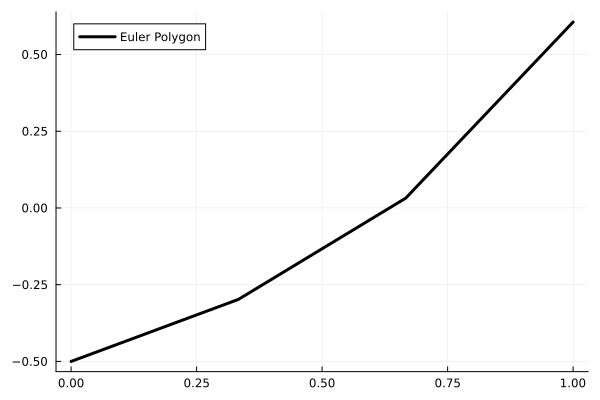

In [8]:
f(y, p, t) = (exp(y)*(1+t));
y0 = -0.5;    # A
tspan = (0.0, 1.0);

## Aufrufen der Methode
eul=euler_method(f, y0, 0, 1, 1/3);
## Plot der Euler-Verfahrens
plot(eul[1], eul[2], label = "Euler Polygon", lw=3, lc=:black, ms=5)

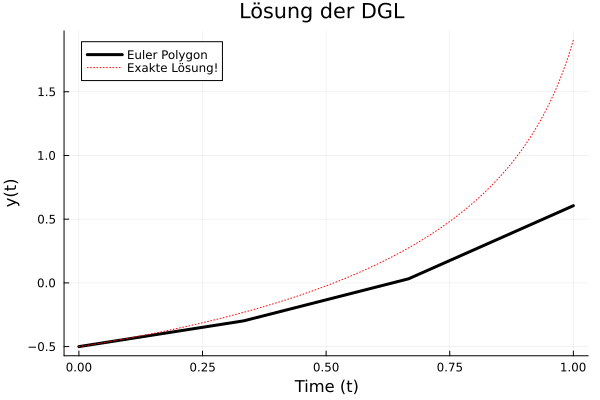

In [9]:
x = range(0, 1, length=100);
y1 = -log.(exp(0.5).-x-x.^2/2)
plot!(x,y1, linewidth = 1, title = "Lösung der DGL ",
    xaxis = "Time (t)", yaxis = "y(t)", label = "Exakte Lösung!", ls=:dot, lc=:red)


<div align="center">
  <img src=Bilder/Richungsfeld_Julia.png" width="80%" />
</div>

<div align="center">
  <img src=Bilder/Euler.png" width="50%" />
</div>


### Verwendung von Bibliotheken 

Standardmethoden wie das Euler-Polygonzugverfahren sind in gängigen Bibliotheken bereits integriert, sodass eine eigene Implementierung nicht mehr erforderlich ist. Im Kontext von Julia (bzw. Python mit der Numpy-Bibliothek) erfolgt der Aufruf wie folgt:



In [10]:
f(y, p, t) = (exp(y)*(1+t));
y0 = -0.5;    # A
tspan = (0.0, 1.0);
# Definiert die Rechte Seite der gewöhnlichen DGL
prob = ODEProblem(f,y0,tspan);
# Löst das Problem  mittels 
sol = solve(prob, Euler(), dt=1/6);


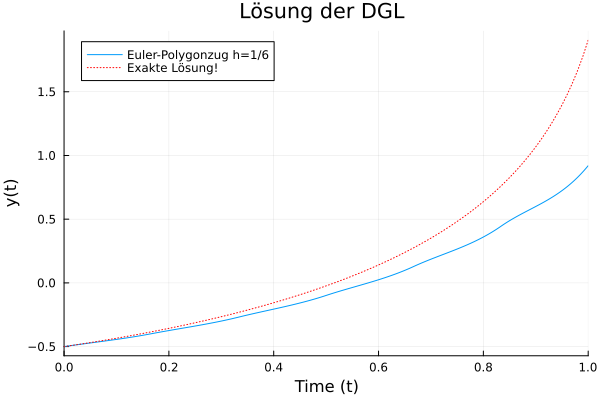

In [11]:
plot(sol, label = "Euler-Polygonzug h=1/6")

#Vergleich exakte Lösung 
x = range(0, 1, length=100);
y1 = -log.(exp(0.5).-x-x.^2/2)
plot!(x,y1, linewidth = 1, title = "Lösung der DGL ",
    xaxis = "Time (t)", yaxis = "y(t)", label = "Exakte Lösung!", ls=:dot, lc=:red)

### Implizites Euler-Verfahren

**Idee:** Nutze lineare Approximation in jedem Punkt. 

Diskretisierung: $0=t_0<t_1<t_n=1$: $h=  t_{i+1}-t_{i}$:

1. Schritt: $y_1:= y_0 + h f(t_1, y_1)$
2. Schritt: $y_2:= y_1 + h f(t_2, y_2)$
3. Schritt: $y_3:= y_2 + h f(t_3, y_3)$

usw. 

Es ergibt sich der folgende ***Algorithmus***: 
$$
y_{i+1}= y_i+h f(t_{i+1},y_{i+1}) 
$$
für alle $i=0,\cdots, n-1$. 

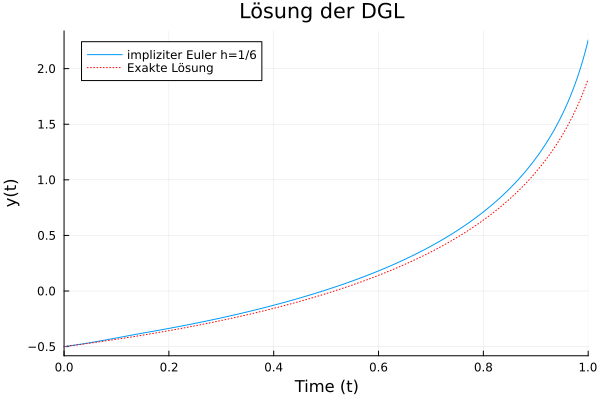

In [60]:
#Problem von zuvor
f(u, p, t) = (exp(u)*(1+t))
u0 = -0.5
tspan = (0.0, 1.0)
prob = ODEProblem(f,u0,tspan);
# Löst das Problem 
sol = solve(prob, ImplicitEuler(),dt=1/6)
plot(sol, label = "impliziter Euler h=1/6")
plot!(x,y1, linewidth = 1, title = "Lösung der DGL ",
    xaxis = "Time (t)", yaxis = "y(t)", label = "Exakte Lösung", ls=:dot, lc=:red)

***Ist es eine gute Idee?***

- Existenz einer Lösung:

Wir betrachten das folgende Beispiel: 
\begin{equation}
y'(t)=y(t), \qquad y(0)=1.
\end{equation}
Lösung ist  $y(t)= \mathrm{e}^t$.


Der implizite Euler ergibt mit $h=1$: 
\begin{equation}
y_1=y_0+ h y_1  \Longleftrightarrow 0=1 
\end{equation}






- Eindeutigkeit:

\begin{equation}
y'(t)=y^2(t), \qquad y(0)=0.
\end{equation}






Der implizite Euler ergibt die zwei Lösungen: 
\begin{equation}
y_1=0, \qquad y_1=\frac{1}{h}.
\end{equation}


***Ist es eine gute Idee?***

- Existenz einer Lösung
- Eindeutigkeit
- Numerischer Aufwand ?
- Nutzen?




### Keine clevere Idee?

### $\color{green}{\text{Steife Differentialgleichungen}}$

***Was ist eine steife Differentialgleichung?***


- Unterschiedliche Reaktionsgeschwindigkeiten

- Verschiedene Zeitskalen

- Numerische Instabilität 

- Schwierige Anfangsbedinungen

Typische Anwendungen: ***Biologische und chemische Prozesse***

### Beispiel 

Betrachten wir das folgende Anfangswertproblem 
\begin{equation}
y'(t)= \lambda (y(t)-2), \qquad y(0)=1
\end{equation}

mit $\lambda=-4$. 

Die exakte Lösung ist gegeben durch $y(t)= 2- \mathrm{e}^{-4t}$. 

In [4]:
# Definiere die exakte Lösung
y_exact(t) = 2 - exp(-4 * t);
t = 0:0.01:10;
y_values = y_exact.(t);

plot(t, y_values,  label="Exakte Lösung", lw=2, color=:black);


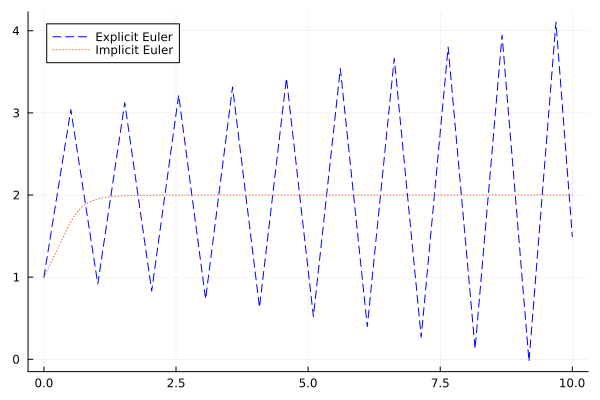

In [66]:
f(u, p, t) = p*(u-2); 
p= - 4.; 
u0 = 1.; 
tspan = (0.0, 10.0);

prob = ODEProblem(f,u0,tspan,p);
sol_explicit = solve(prob, Euler(), dt=0.51); ### 0.5 Grenze für Konvergenz
plot(sol_explicit.t, sol_explicit[1,:], label="Explicit Euler", color=:blue, linestyle=:dash)
sol_implicit = solve(prob, ImplicitEuler(), dt=0.5);
plot!(sol_implicit.t, sol_implicit[1,:], label="Implicit Euler", linestyle=:dot)

### SIR-Modell Beispiel 

Wir betrachten das SIR-Beispiel mit schnellen Infektiongeschen und langsamer Erholung, d.h. $\beta=1$ deutlich größer als $\gamma$. Es ergibt sich das folgende Bild für das Setting: 

In [19]:
u0=[999.,1, 0]; 
p = (1.0, 0.01);  
tspan = (0.0, 100.0);
prob = ODEProblem(SIR_flux!, u0, tspan, p);
dt=1.0;

In [ ]:
sol_explicit = solve(prob, Euler(), dt=1.0);
sol_implicit = solve(prob, ImplicitEuler(),dt=1.0);
sol_reference = solve(prob,Hairer42());
# Plotting the results
colors = [:blue, :red, :black,:green] 
plot(sol_explicit.t, sol_explicit[1,:], label="S (Explicit Euler)", color=colors[1], linestyle=:dash, lw=2)
plot!(sol_explicit.t, sol_explicit[2,:], label="I (Explicit Euler)",color=colors[1],  linestyle=:dash, lw=2)
plot!(sol_explicit.t, sol_explicit[3,:], label="R (Explicit Euler)",color=colors[1],  linestyle=:dash, lw=2)

plot!(sol_implicit.t, sol_implicit[1,:], label="S (Implicit Euler)",color=colors[2], linestyle=:dot, lw=2)
plot!(sol_implicit.t, sol_implicit[2,:], label="I (Implicit Euler)",color=colors[2], linestyle=:dot, lw=2)
plot!(sol_implicit.t, sol_implicit[3,:], label="R (Implicit Euler)",color=colors[2], linestyle=:dot, lw=2)
plot!(sol_reference.t, sol_reference[1,:], label="S (Reference)",color=colors[3], lw=3)
plot!(sol_reference.t, sol_reference[2,:], label="I (Reference)",color=colors[3], lw=3)
plot!(sol_reference.t, sol_reference[3,:], label="R (Reference)",color=colors[3],  lw=3)

xlabel!("Time")
ylabel!("Population")
title!("SIR Model: Explicit vs Implicit Euler")
#savefig("SIR_Model.png")

<div align="center">
  <img src=Bilder/SIR_Model.png" width="40%" />
</div>


### Robertson-Test 

Wir betrachten den Robertson-Test für chemische Reaktionen. Er war gegeben durch

### Robertson's Problem (1966):
\begin{equation}
\begin{cases}
c_1'(t)&=10^4c_2(t)c_3(t)-0.04c_1(t),\\
c_2'(t)&= 0.04c_1(t)-10^4c_2(t)c_3(t)-3 \cdot 10^7c_2(t)^2,\\
c_3'(t)&=3\cdot 10^7c_2(t)^2,
\end{cases}
\end{equation}
Anfangsbedingung: $c^0=(1,0,0)$

Hier ist das Problem, dass man nicht mehr mit äquidistanten Zeitschritten arbeiten kann falls das Zeitintervall zu groß ist. Herkömliche Methoden werden dabei immer wieder Probleme haben. Lösung ist eine logaritmische Verteilung der Zeitschritte.

In [6]:
# Parameters for the time vector and ODE solver
   T_0 = 10^-6
   T_final = 10^11
   Nt2 = 55
   
   # Create the time vector with variable timesteps
   logdt0 = (log(T_final) - log(T_0)) / Nt2
   dt0 = exp(logdt0)
   
   times2 = zeros(Nt2 + 1)
   times2[1] = T_0
   for it in 1:Nt2
       times2[it + 1] = T_0 * dt0^it
   end

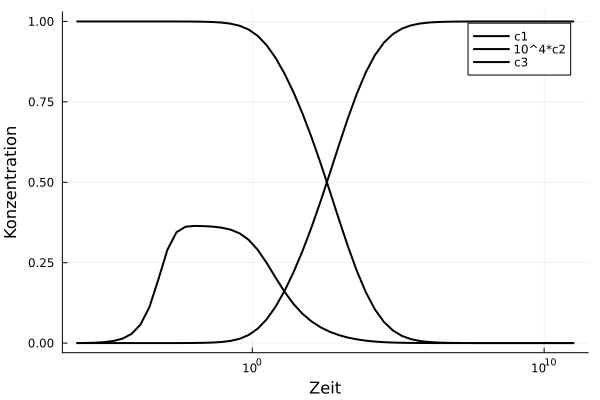

In [37]:
# Anfangsbedingung
 u0 = [1.0, 0.0, 0.0]
# Lösungsmatrix 
sol = zeros(Nt2 + 1, 3)
sol[1, :] = u0
   # Solve the ODE for each time segment
   for it in 1:Nt2
       tspan = (times2[it], times2[it + 1])
       prob = ODEProblem(Robertson!, sol[it, :], tspan)
     ##  sol_Ha = solve(prob, Euler(),dt=(times2[it + 1]-times2[it])/10000) # Funktioniert nicht!!!
       sol_Ha = solve(prob, ImplicitEuler(),dt=(times2[it + 1]-times2[it]))
       sol[it + 1, :] = sol_Ha.u[end]
   end
   sol[:, 2] *= 1e4
   
   # Plotting
   plot(times2, sol,  linewidth = 2, color = [:black :black :black], label = ["c1" "10^4*c2" "c3"], xaxis = :log10, xlabel = "Zeit", ylabel = "Konzentration")

### Strukturerhaltende "moderne" Verfahren 

***Chemische und biologische Prozesse*** können in Form sogenannter Produktion-Destruktions-Systeme beschrieben werden, d.h. $f(t,y(t))=P(t,y(t))- D(t,y(t))$

Beispiel SIR - Modell:

\begin{equation}
\begin{cases}
S'&= - \beta I \frac{S}{N}\\
I'&= \beta I \frac{S}{N}- \gamma I\\
R'& = \gamma I
\end{cases}
\end{equation}



***Produktion & Destruktion:*** 

- $P_1=0$ und $D_1 = \beta I \frac{S}{N}$ 
- $P_2 = \beta I \frac{S}{N}$ und $D_2= \gamma I$
- $P_3 = \gamma I$ und $D_3=0$

System erhält die Masse und ist nicht-negativ!

Eigenschaften des expliziten Euler-Verfahren:

- Masseerhaltend, aber **nicht** positivitätserhaltend!


Bespiel: 
Betrachte 
\begin{align}
c_1'(t)= c_2(t)-5c_1(t), \\
c_2'(t)= 5c_1(t)-c_2(t),
\end{align}
mit Anfangswerten $c_1(0)=0.99$ und $c_2(0)=0.01$. 




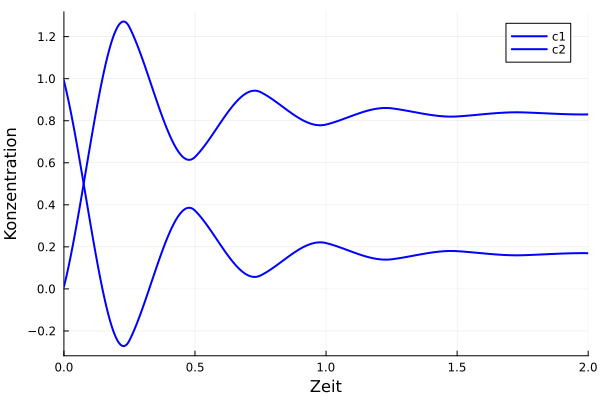

In [40]:
u0=[0.99,0.01]
tspan = (0.0, 2.0)

# Define the ODE problem with the correct arguments
prob = ODEProblem(linear_system2_flux!, u0, tspan, p)

# Solve the ODE problem
sol = solve(prob, Euler(),dt=0.25);
colors = [:blue, :red, :black,:green]
plot(sol, label = ["c1"  "c2"], xlabel="Zeit", ylabel="Konzentration",color=colors[1], lw=2)
#savefig("Bilder/Euler_linear.png")

<div align="center">
  <img src=Bilder/Euler_linear.png" width="40%" />
</div>


In [42]:

sol_im = solve(prob, ImplicitEuler(),dt=1);
plot!(sol_im, label = ["c1_im"  "c2_im"], xlabel="Zeit", ylabel="Konzentration", color=colors[2],lw=2)
#savefig("Bilder/Euler_linear_im.png")

"/Users/quelthalas/Desktop/Präsentationen/Bilder/Euler_linear_im.png"

<div align="center">
  <img src=Bilder/Euler_linear_im.png" width="40%" />
</div>


Eigenschaften des implizierten Euler-Verfahren:

- Masseerhaltend 

- Positivitätserhaltend 

Nichtlineare Löser kann zu Problemen führen!



### (Modifizierte) Patankar-Verfahren 

***Ziel***:  Verfahren entwickeln, das sowohl den Massenerhalt als auch die Positivität gewährleistet und dabei ohne nichtlinearen Löser auskommt.

Wir betrachten PD-Systeme der Form: 

\begin{equation}
\begin{cases}
  c_i'(t) = P_i(c ) - D_i(c ) , \quad  i=1, \dots,I, \quad & P_i(c) = \sum_{j=1}^I p_{i,j}(c),\\
 c(0)=c_0,& D_i(c) = \sum_{j=1}^I d_{i,j}(c),
 \end{cases}
 \end{equation}
   mit 
    $p_{i,j}(c) , d_{i,j} (c) \geq 0, \qquad \forall i,j \in I, \quad \forall c \in \mathbb R^{+,I}$.



#### Patankar-Verfahren (1980)

Idee: Nutze Euler-Verfahren und gewichte Destruktionsterm, so dass es nichtnegativ werden kann, d.h. 


\begin{align}
c_i^{n+1}=c_i^n+ h  \left( \sum_{j=1}^I p_{i,j}(c^n) - \sum_{j=1}^I d_{i,j}(c^n) \frac{c^{n+1}_i}{c_i^n} \right), \quad i=1,\dots, I,
\end{align}


Das Verfahren ist jedoch ***nicht*** mehr massenerhaltend.

#### Modifizierte Patankar-Verfahren (H Burchard, E Deleersnijder, A Meister 2003)

Idee: Nutze Patankar-Euler und gewichte Produktionsterme, so dass nichtnegativ und konservativ, d.h. 

\begin{align}
c_i^{n+1}=c_i^n+ h  \left( \sum_{j=1}^I p_{i,j}(c^n)\frac{c^{n+1}_j}{c_j^n}  - \sum_{j=1}^I d_{i,j}(c^n) \frac{c^{n+1}_i}{c_i^n} \right), \quad i=1,\dots, I,
\end{align}

***Eigenschaften:***

- $\color{blue}{\text{Masseerhaltend}}$

- $\color{blue}{\text{Positivitätserhaltend }}$

- $\color{blue}{\text{Lineares Gleichungssystem}}$ zu lösen


Matrix-Vector-Notation liefert 

$$M c^{n+1}=c^n \text{ mit } M_{i,j}(c^n) = \begin{cases}
1+ h \sum_{l=1}^I \frac{d_{i,}(c^n)}{c_i^n} \quad \text{für} {i=j}\\
- h \frac{p_{i,j}(c^n)}{c_j^n} \qquad \text{ für} i \neq j.
\end{cases}$$ 







Beispiel:
\begin{align}
c_1'(t)= c_2(t)-5c_1(t), \\
c_2'(t)= 5c_1(t)-c_2(t),
\end{align}

mit Anfangswerten $c_1(0)=0.99$ und $c_2(0)=0.01$. 




In [44]:
u0=[0.99,0.01];
T_fin=2;
dt= 0.25;
tt=0:dt:T_fin;
tspan=length(tt);
param_a,param_b=  1, 5.0; 

function prod_dest(c)
    d= length(c)
    p=zeros(d,d)
    d=zeros(d,d)
    p[1,2]=param_a*c[2]
    d[2,1]=param_a*c[2]
    p[2,1]=param_b*c[1]
    d[1,2]=param_b*c[1]
    return p, d
end

tout,uu= patankar(prod_dest, tt, u0);
tt, UU = mPEuler(prod_dest, tt, u0);

In [45]:
plot(tt, uu[1, :], label="c1_Patankar", xlabel="Zeit", ylabel="Konzentration",color=colors[3], lw=2)
plot!(tout, uu[2, :], label="c2_Patankar", xlabel="Zeit", ylabel="Konzentration",color=colors[3], lw=2)
plot!(tt, UU[1, :], label="c1_MP", xlabel="Zeit", ylabel="Konzentration",color=colors[4], lw=2)
plot!(tt, UU[2, :], label="c2_MP", xlabel="Zeit", ylabel="Konzentration",color=colors[4], lw=2)
savefig("Bilder/Euler_Patankar_linear_2.png")

"/Users/quelthalas/Desktop/Präsentationen/Bilder/Euler_Patankar_linear_2.png"

<div align="center">
  <img src=Bilder/Euler_Patankar_linear_2.png" width="40%" />
</div>


#### Beispiel: SIR 

\begin{equation}
\begin{cases}
S'&= - \beta I \frac{S}{N}\\
I'&= \beta I \frac{S}{N}- \gamma I\\
R'& = \gamma I
\end{cases}
\end{equation}


In [31]:
T_fin= 100.
u0=[999.,1, 10^-20]
dt=1
tt=0:dt:T_fin
tt, UU = mPEuler(SIR_production_destruction, tt, u0);

In [35]:

colors = [:blue, :red, :black,:green] 
# Plot the results
plot(tt, UU[1, :], label="S", xlabel="Zeit", ylabel="Bevölkerung",color=colors[1], lw=2)
plot!(tt, UU[2, :], label="I",color=colors[1], lw=2)
plot!(tt, UU[3, :], label="R",color=colors[1], lw=2)
plot!(tt,  UU[1, :]+  UU[2, :]+ UU[3, :], label="Total", lw=2, linestyle=:dash)


u0=[999.,1, 0]; 
p = (1.0, 0.1);  
tspan = (0.0, 100.0);
prob = ODEProblem(SIR_flux!, u0, tspan, p);
sol_reference = solve(prob,Hairer42());
plot!(sol_reference.t, sol_reference[1,:], label="S (Referenz)",color=colors[3], lw=3)
plot!(sol_reference.t, sol_reference[2,:], label="I (Referenz)",color=colors[3], lw=3)
plot!(sol_reference.t, sol_reference[3,:], label="R (Referenz)",color=colors[3],  lw=3)
savefig("Bilder/SIR_Patankar_Update.png")

"/Users/quelthalas/Desktop/Präsentationen/Bilder/SIR_Patankar_Update.png"

<div align="center">
  <img src=Bilder/SIR_Patankar_Update.png" width="60%" />
</div>

#### Beispiel: Robertson 

\begin{equation}
\begin{cases}
c_1'(t)&=10^4c_2(t)c_3(t)-0.04c_1(t),\\
c_2'(t)&= 0.04c_1(t)-10^4c_2(t)c_3(t)-3 \cdot 10^7c_2(t)^2,\\
c_3'(t)&=3\cdot 10^7c_2(t)^2,
\end{cases}
\end{equation}
Anfangsbedingung: $c^0=(1,0,0)$

In [57]:
eps= 2.22*10^(-16);
u0=[1.0-2.0*eps;eps;eps]; 
tspan, yy = mPEuler(Robertson_production_destruction,  times2, u0);

In [58]:
plot(tspan, yy[1, :], xscale=:log10, label="c1", xlabel="Zeit", ylabel="Konzentration",color=colors[1])
plot!(tspan, yy[2, :] .* 10^4, xscale=:log10, label="c2 * 10^4", color=colors[2])
plot!(tspan, yy[3, :], xscale=:log10, label="c3",color=colors[3])
plot!(tspan, sum(yy, dims=1)', xscale=:log10, label="Total")
savefig("Bilder/Patankar_Roberson.png")

"/Users/quelthalas/Desktop/Präsentationen/Bilder/Patankar_Roberson.png"

<div align="center">
  <img src=Bilder/Patankar_Roberson.png" width="30%" />
</div>

<br><br><br>


<center>
<h1>$\color{green}{\text{Vielen Dank}}$</h1>
</center>

<br><br><br>




Die Folien und Programme können Sie sich runtergeladenauf: 

